# Code for Figure 3 part (c) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
maxpen_results1 = pd.read_csv('Results/max_penetration_levels_1h_20211119.csv', index_col=0)
maxpen_results8 = pd.read_csv('Results/max_penetration_levels_1h_bau_20211119.csv', index_col=0)

In [4]:
maxpen_results8

,fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak,fuel1_solar1_wind1_BusinessAsUsual_WPcontrol_minpeak,fuel1_solar5_wind5_BusinessAsUsual_WPcontrol_minpeak
TimersMixed,0.47,0.01,1.0


In [5]:
def fig3c(maxpen_results, cols, cols1, cols2, maxpen_result_bau, legend=True, save_str=None):
    fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
    axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=14)

    values = maxpen_results.loc['Timers9pm', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, values, 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    values = maxpen_results.loc['Timers12am', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, values, 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    values = maxpen_results.loc['TimersNone', cols1]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, values, 0.1, color=colors[3], label=control_labels[3], edgecolor='k', hatch=hatches[3])
    values = maxpen_results.loc['TimersNone', cols2]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, values, 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    values = maxpen_results.loc['TimersNone', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5]), values, 0.1, color=colors[2], edgecolor='k', label=control_labels[2], hatch=hatches[2])
    axes.bar([1.75], maxpen_result_bau, 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc=(1, 1), fontsize=10.5, ncol=1)
        
    
    axes.set_ylabel('Max Level of EVs Supported', fontsize=12)
    axes.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes.set_yticklabels(['0', '20%', '40%', '60%', '80%','100%'], fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=12)
#     axes.set_yticks(np.arange(0, 35, 5))
#     axes.set_yticklabels(np.arange(0, 35, 5), fontsize=14)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')

    plt.tight_layout()
    if save_str is not None:
        plt.savefig('MainPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
    plt.show()

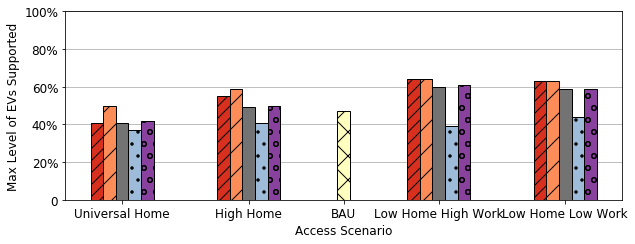

In [6]:
solar = 2.5
wind = 2.5 
cols = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_noWPcontrol' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols1 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_minpeak' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols2 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_avgem' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
fig3c(maxpen_results1, cols, cols1, cols2, maxpen_results8.loc['TimersMixed', 'fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak'], legend=False, save_str='fig3c')


# Combined plot

In [7]:
def fig3c_combined(maxpen_results, axes, cols, cols1, cols2, maxpen_result_bau, legend=True, save_str=None):
#     fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
    axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=14)

    values = maxpen_results.loc['Timers9pm', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, values, 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    values = maxpen_results.loc['Timers12am', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, values, 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    values = maxpen_results.loc['TimersNone', cols1]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, values, 0.1, color=colors[3], label=control_labels[3], edgecolor='k', hatch=hatches[3])
    values = maxpen_results.loc['TimersNone', cols2]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, values, 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    values = maxpen_results.loc['TimersNone', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5]), values, 0.1, color=colors[2], edgecolor='k', label=control_labels[2], hatch=hatches[2])
    axes.bar([1.75], maxpen_result_bau, 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc=(1, 1), fontsize=10.5, ncol=1)
        
    
    axes.set_ylabel('Max EVs Supported', fontsize=14)
    axes.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes.set_yticklabels(['0', '20%', '40%', '60%', '80%','100%'], fontsize=14)
    axes.set_xlabel('Access Scenario', fontsize=14)
#     axes.set_yticks(np.arange(0, 35, 5))
#     axes.set_yticklabels(np.arange(0, 35, 5), fontsize=14)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')

    return axes
#     plt.tight_layout()
#     if save_str is not None:
#         plt.savefig('MainPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
#     plt.show()

In [8]:
def fig3ab(vals, axes, legend=True, save_str=None, xlabs=True, ylab='Change in Weekday Peak [GW]'):
#     fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    if xlabs:
        axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
        axes.set_xlabel('Access Scenario', fontsize=14)
    else:
        axes.set_xticklabels(labels=[])
    axes.set_ylabel(ylab, fontsize=14)
        

    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, (1/1000)*vals[0, np.arange(0, 4)], 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, (1/1000)*vals[1, np.arange(0, 4)], 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, (1/1000)*vals[3, np.arange(0, 4)], 0.1, color=colors[3], label=control_labels[3], edgecolor='k', hatch=hatches[3])
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, (1/1000)*vals[4, np.arange(0, 4)], 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    axes.bar(np.array([0, 1, 2.5, 3.5]), (1/1000)*vals[2, np.arange(0, 4)], 0.1, color=colors[2], edgecolor='k', label=control_labels[2], hatch=hatches[2])
    axes.bar([1.75], (1/1000)*vals[5, 4], 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc=(1, 1), fontsize=10.5, ncol=1)
    axes.set_yticks(np.arange(0, 35, 5))
    axes.set_yticklabels(np.arange(0, 35, 5), fontsize=14)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')

    return axes
#     plt.tight_layout()
#     if save_str is not None:
#         plt.savefig('MainPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
#     plt.show()

In [10]:
noev_scenario = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')
inds = noev_scenario[pd.to_datetime(noev_scenario['datetime']).dt.weekday.isin([0, 1,2,3,4])].index
refval1 = noev_scenario.loc[inds, 'total_incl_noncombustion'].values.reshape(-1,24).mean(axis=0).max()
refval2 = noev_scenario.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

In [11]:
vals1 = 1000*pd.read_csv('MainPlotting/Tables/fig3a.csv', index_col=0)
vals2 = 1000*pd.read_csv('MainPlotting/Tables/fig3b.csv', index_col=0)

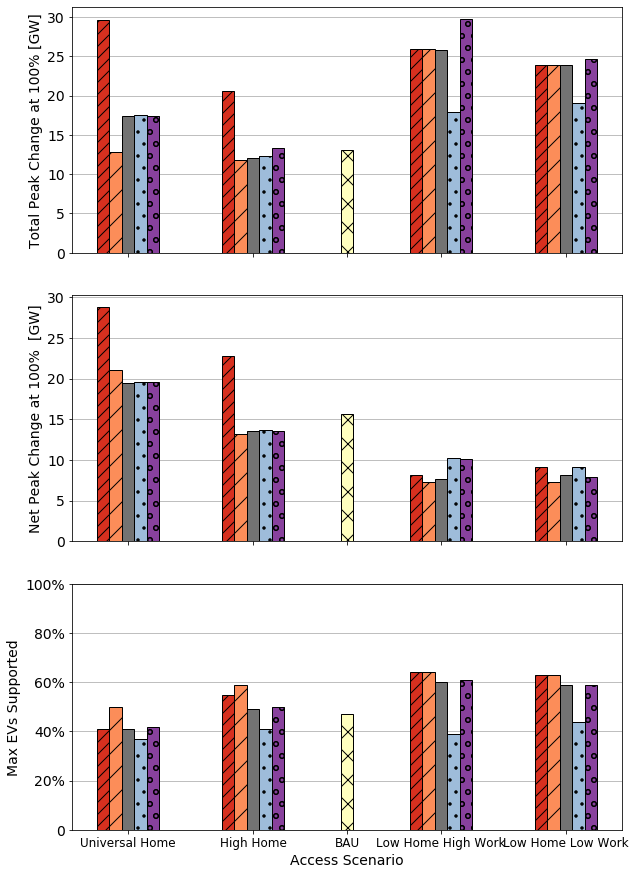

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(9, 12.5))
axes[0] = fig3ab(vals1.values, axes[0], legend=False, xlabs=False, ylab='Total Peak Change at 100% [GW]')
axes[1] = fig3ab(vals2.values, axes[1], legend=False, xlabs=False, ylab='Net Peak Change at 100%  [GW]')
axes[2] = fig3c_combined(maxpen_results1, axes[2], cols, cols1, cols2, maxpen_results8.loc['TimersMixed', 'fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak'], 
      legend=False, save_str=None)
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig3_combined.pdf', bbox_inches='tight')
plt.show()

# Stats:

In [13]:
print('Best case: ', np.round(maxpen_results1.loc['Timers12am', 'fuel1_solar2.5_wind2.5_LowHome_HighWork_noWPcontrol'], 5))
print('Worst case: ', np.round(maxpen_results1.loc['Timers9pm', 'fuel1_solar2.5_wind2.5_UniversalHome_noWPcontrol'], 5))

Best case:  0.64
Worst case:  0.41


In [14]:
print('Adding timers increases from _ to _ in high home:')
print('Uncontrolled: ', np.round(maxpen_results1.loc['TimersNone', 'fuel1_solar2.5_wind2.5_HighHome_noWPcontrol'], 5))
print('12am timers: ', np.round(maxpen_results1.loc['Timers12am', 'fuel1_solar2.5_wind2.5_HighHome_noWPcontrol'], 5))

Adding timers increases from _ to _ in high home:
Uncontrolled:  0.49
12am timers:  0.59


In [15]:
print('Adding work control decreases from _ to _ in low home high work:')
print('Uncontrolled: ', np.round(maxpen_results1.loc['TimersNone', 'fuel1_solar2.5_wind2.5_LowHome_HighWork_noWPcontrol'], 5))
print('WP control: ', np.round(maxpen_results1.loc['TimersNone', 'fuel1_solar2.5_wind2.5_LowHome_HighWork_WPcontrol_minpeak'], 5))

Adding work control decreases from _ to _ in low home high work:
Uncontrolled:  0.6
WP control:  0.39


In [16]:
print('_ % more EVs can be supported in Low Home High Work than in Universal Home, without control')
print(100*((maxpen_results1.loc['TimersNone', 'fuel1_solar2.5_wind2.5_LowHome_HighWork_noWPcontrol'] / maxpen_results1.loc['TimersNone', 'fuel1_solar2.5_wind2.5_UniversalHome_noWPcontrol'])-1))

_ % more EVs can be supported in Low Home High Work than in Universal Home, without control
46.34146341463412
